In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/attrition/Attrition.csv


In [2]:
!pip install -q hvplot
!pip install plotly

In [3]:
import hvplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.express as px
%matplotlib inline
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [4]:

df = pd.read_csv("/kaggle/input/attrition/Attrition.csv")
df.head()
#/kaggle/input/attrition/Attrition.csv

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
print(df.describe())

          Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                  

In [6]:
#Check the sum of null values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#check the unique values FOR EACH ATTRIBUTE
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [8]:
#data preprocessing:
#Removing the attribute that has single value since it will be contributing in our analysis
df.drop(['EmployeeCount','Over18','StandardHours'],axis = 'columns',inplace=True)

In [9]:
#Lets convert the target variable that is Attrition from categorical to numerical values using label encoders

#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#df["Attrition"] = label.fit_transform(df.Attrition)

In [10]:
# Now Looks like our data is clean so to further explore the dataset i try to get ratio of female:male employee count & their age
gender_age = df.groupby('Gender').agg(
    count=('Gender', 'size'),
    average_age=('Age', 'mean')
).reset_index()
gender_age

,Gender,count,average_age
0,Female,588,37.33
1,Male,882,36.65


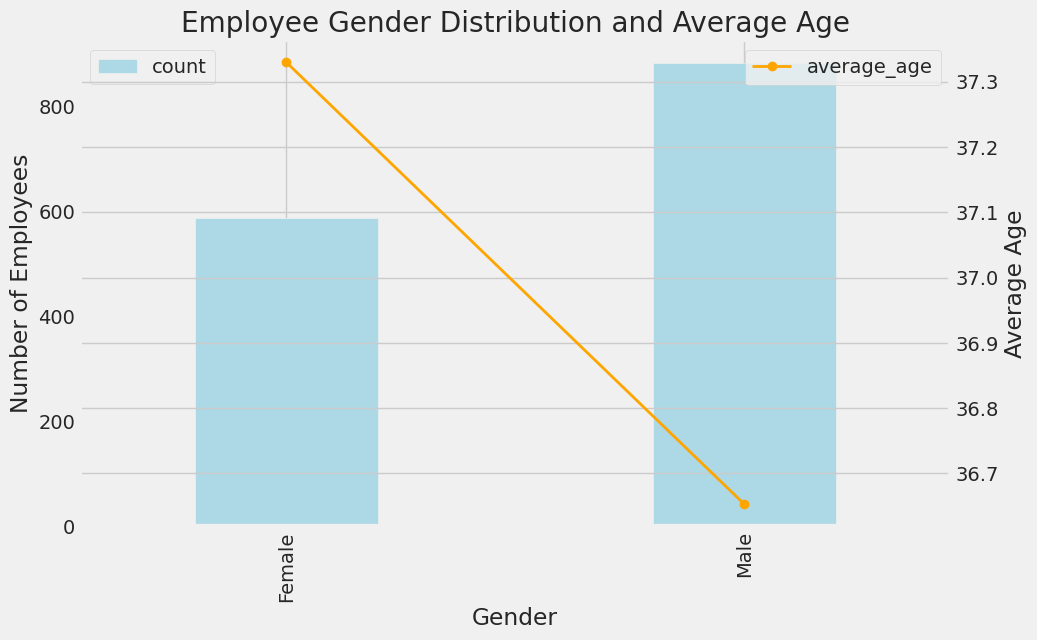

In [11]:
#Now lets plot the male:female ratio with their avarage age
import matplotlib.pyplot as plt

# Create a bar plot for counts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count of employees by gender
gender_age.plot(x='Gender', y='count', kind='bar', ax=ax1, color='lightblue', width=0.4)
ax1.set_ylabel('Number of Employees')
ax1.set_title('Employee Gender Distribution and Average Age')

# Create a second y-axis for average age
ax2 = ax1.twinx()
gender_age.plot(x='Gender', y='average_age', kind='line', marker='o', ax=ax2, color='orange', linewidth=2)
ax2.set_ylabel('Average Age')

# Show grid
ax1.grid(axis='y')

# Display the plot
plt.show()


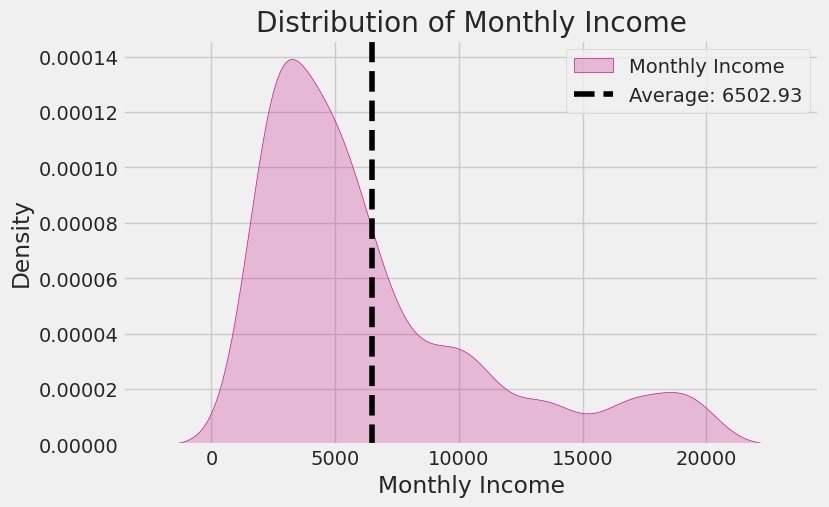

In [12]:
#Noe irresspective of gender lets check salary distribution across thee population
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['MonthlyIncome'],color='MediumVioletRed',shade=True,label='Monthly Income')
plt.axvline(x=df['MonthlyIncome'].mean(),color='k',linestyle ="--",label='Average: 6502.93')
plt.xlabel('Monthly Income')
plt.legend()
plt.title('Distribution of Monthly Income')
plt.show()


In [13]:
#So the distribution is not the normal distribution & avarage income observed across population is 6503/-

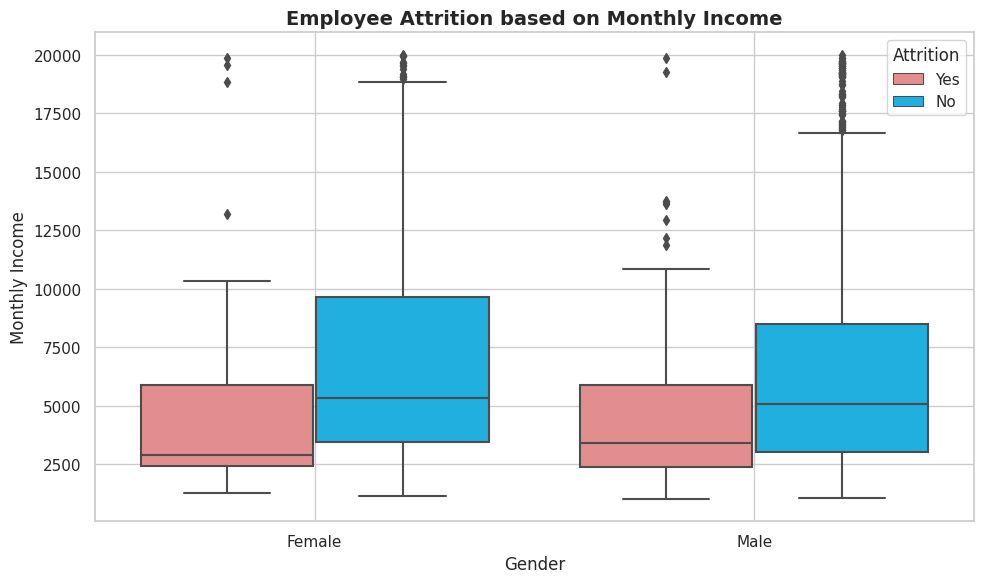

In [14]:
#Lets check Attrition based on monthly income
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='MonthlyIncome', hue='Attrition', data=df,
            palette={'Yes': 'LightCoral', 'No': 'DeepSkyBlue'})

# Update axes visibility
plt.gca().xaxis.set_visible(True)
plt.gca().yaxis.set_visible(True)

# Update layout
plt.title('Employee Attrition based on Monthly Income', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

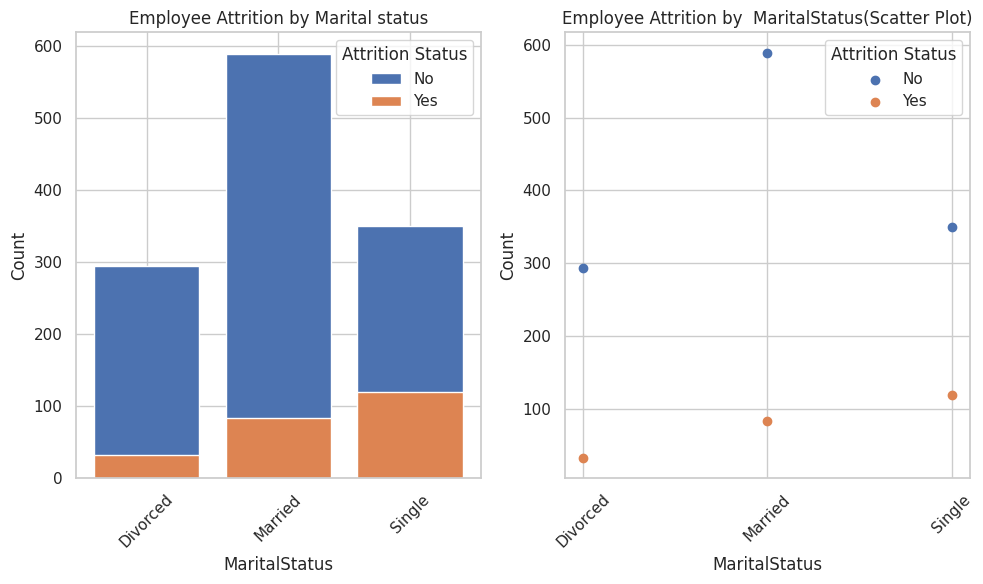

In [15]:
#Employee attrition based on marital status
count_data = df.groupby(['MaritalStatus', 'Attrition']).size().reset_index(name='Count')

# Step 3: Create a bar plot
plt.figure(figsize=(10, 6))

# Bar plot
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
for attrition in count_data['Attrition'].unique():
    subset = count_data[count_data['Attrition'] == attrition]
    plt.bar(subset['MaritalStatus'], subset['Count'], label=attrition)

plt.title('Employee Attrition by Marital status')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Status')

# Step 4: Create a scatter plot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
for attrition in count_data['Attrition'].unique():
    subset = count_data[count_data['Attrition'] == attrition]
    plt.scatter(subset['MaritalStatus'], subset['Count'], label=attrition)

plt.title('Employee Attrition by  MaritalStatus(Scatter Plot)')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Status')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [16]:
#attrition based on job satisfaction
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

In [17]:
#attrition based on number of company worked
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

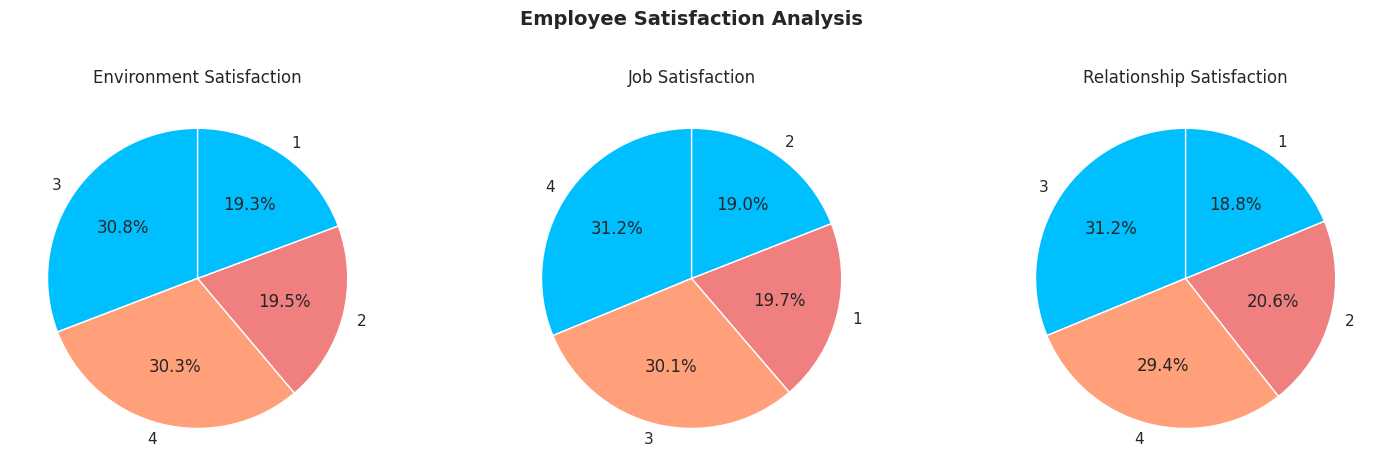

In [18]:
# Prepare data for pie charts
env_counts = df['EnvironmentSatisfaction'].value_counts()
job_counts = df['JobSatisfaction'].value_counts()
rel_counts = df['RelationshipSatisfaction'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for Environment Satisfaction
axs[0].pie(env_counts, labels=env_counts.index,
           colors=['DeepSkyBlue', 'LightSalmon', 'LightCoral'],
           autopct='%1.1f%%', startangle=90)
axs[0].set_title('Environment Satisfaction')

# Pie chart for Job Satisfaction
axs[1].pie(job_counts, labels=job_counts.index,
           colors=['DeepSkyBlue', 'LightSalmon', 'LightCoral'],
           autopct='%1.1f%%', startangle=90)
axs[1].set_title('Job Satisfaction')

# Pie chart for Relationship Satisfaction
axs[2].pie(rel_counts, labels=rel_counts.index,
           colors=['DeepSkyBlue', 'LightSalmon', 'LightCoral'],
           autopct='%1.1f%%', startangle=90)
axs[2].set_title('Relationship Satisfaction')

# Update layout
plt.suptitle('Employee Satisfaction Analysis', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle

# Show the plot
plt.show()


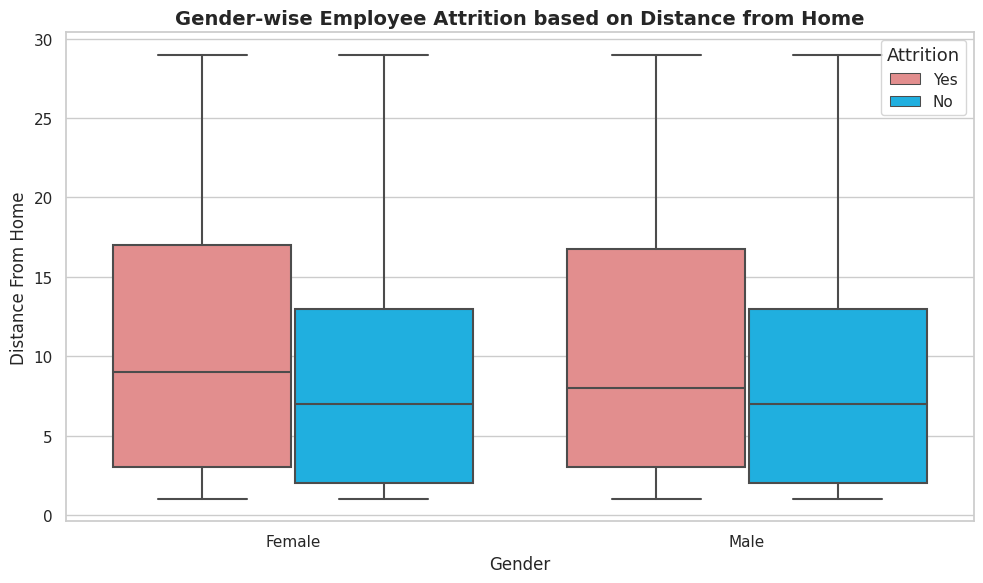

In [19]:
#Attrition based on distance from home
import seaborn as sns
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='Gender', y='DistanceFromHome', hue='Attrition', data=df,
                        palette={'Yes': 'LightCoral', 'No': 'DeepSkyBlue'})

# Set labels and title
box_plot.set_xlabel('Gender')
box_plot.set_ylabel('Distance From Home')
box_plot.set_title('Gender-wise Employee Attrition based on Distance from Home',
                   fontsize=14, fontweight='bold', family='Times New Roman')

# Update legend
plt.legend(title='Attrition', title_fontsize='13', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
#lets try to get which field sector/education section encounter attrition as per the dataset

unique_names_df = df['EducationField'].drop_duplicates()
print("Unique Names (DataFrame):\n", unique_names_df)

Unique Names (DataFrame):
 0         Life Sciences
2                 Other
4               Medical
27            Marketing
33     Technical Degree
100     Human Resources
Name: EducationField, dtype: object


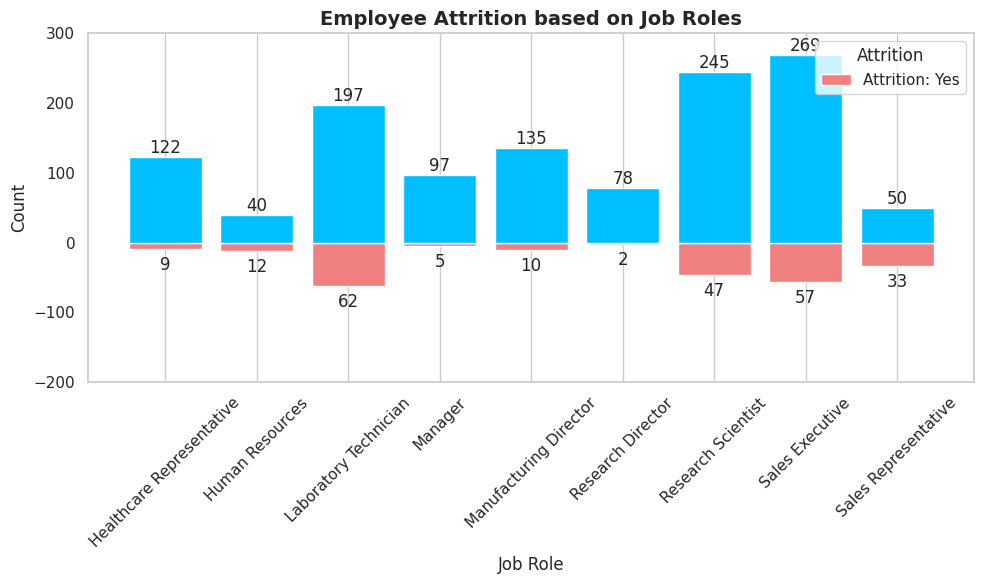

In [21]:
# Grouping data by JobRole and Attrition
k = df.groupby(['JobRole', 'Attrition'], as_index=False)['Age'].count()
a = k[k['Attrition'] == 'Yes']
b = k[k['Attrition'] == 'No']

# Negate the count for Yes attrition to create a visual separation
a['Age'] = -a['Age']
k = pd.concat([a, b], ignore_index=True)
k['Count'] = k['Age']
k.rename(columns={'JobRole': 'Job Role'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(k['Job Role'], k['Count'], color=['LightCoral' if attr == 'Yes' else 'DeepSkyBlue' for attr in k['Attrition']])

# Adding text labels outside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval if yval > 0 else yval - 10,
             abs(int(yval)), ha='center', va='bottom' if yval > 0 else 'top')

# Update y-axis limits
plt.ylim(-200, 300)

# Set labels and title
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Employee Attrition based on Job Roles', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show legend manually
plt.legend(['Attrition: Yes', 'Attrition: No'], title='Attrition', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


#Conclusion#

1. Its observed with dataset that employee with low job level, unmarried, low montly income & one with less years of experince has high tendency to leave organization
2. Attrition in male is slightly higher compared to female
3. The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

In [22]:
#applying suitable machine learning algorithm

In [23]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [24]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 137 entries, Age to YearsWithCurrManager_17
dtypes: int64(10), uint8(127)
memory usage: 297.3 KB


(1470, 137)

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [26]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [27]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [28]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l2')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  16]
 [ 55 111]]
ACCURACY SCORE:
0.9310
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.87      0.93       0.91          0.93
recall      0.98   0.67      0.93       0.83          0.93
f1-score    0.96   0.76      0.93       0.86          0.93
support   863.00 166.00      0.93    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  26]
 [ 42  29]]
ACCURACY SCORE:
0.8458
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.53      0.85       0.71          0.83
recall      0.93  0.41      0.85       0.67          0.85
f1-score    0.91  0.46      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


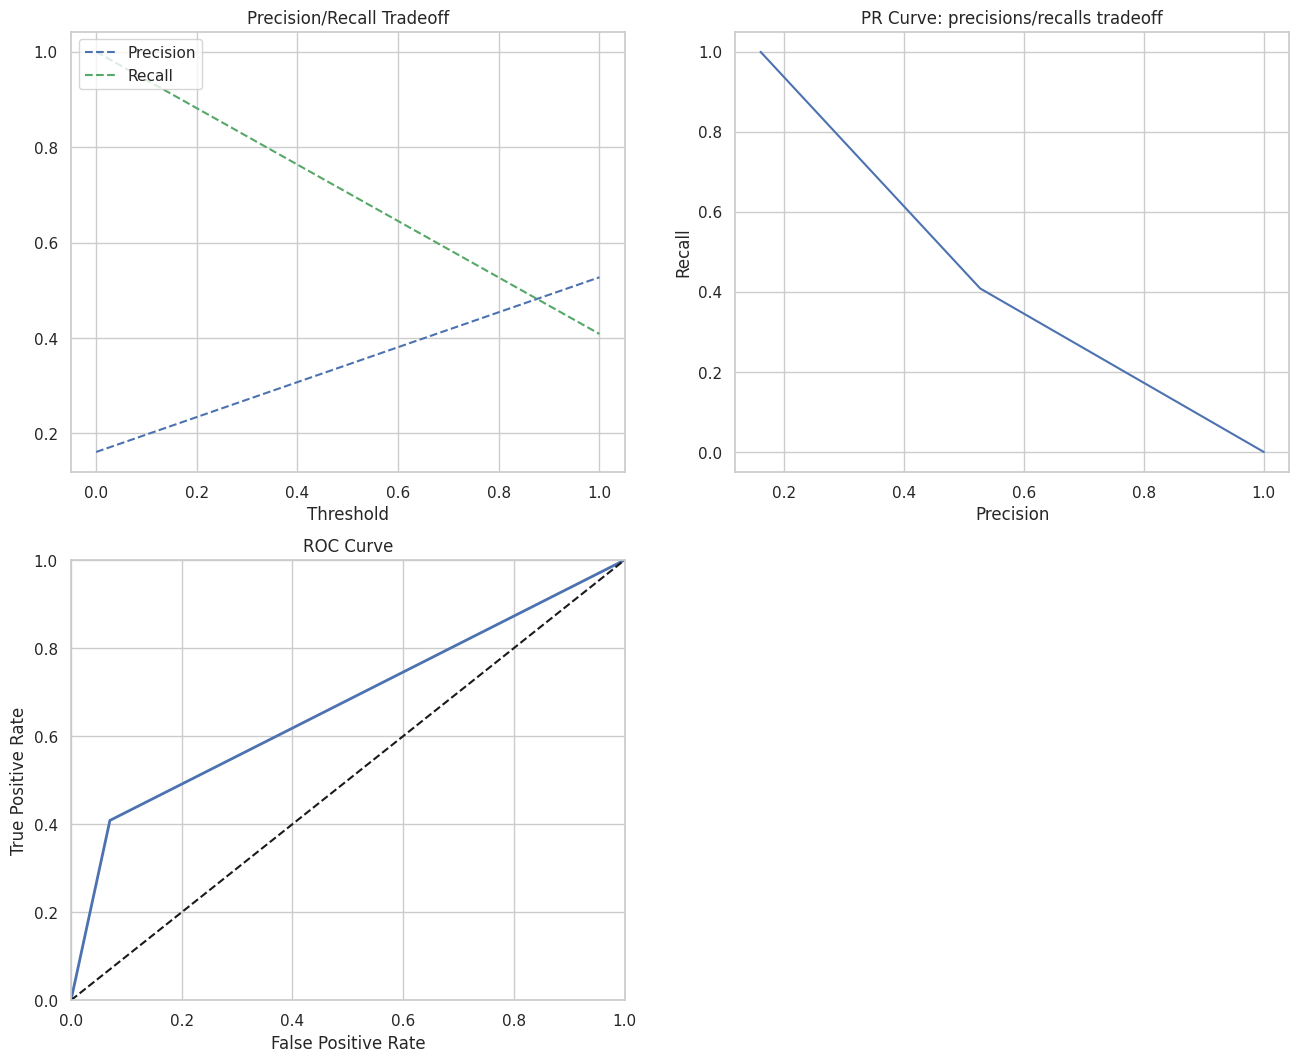

In [31]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [32]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

**Support vector Machine**

In [33]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

#evaluate
evaluate(svm_clf,X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[857   6]
 [ 48 118]]
ACCURACY SCORE:
0.9475
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.95      0.95       0.95          0.95
recall      0.99   0.71      0.95       0.85          0.95
f1-score    0.97   0.81      0.95       0.89          0.94
support   863.00 166.00      0.95    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 46  25]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.88  0.50      0.84       0.69          0.82
recall      0.93  0.35      0.84       0.64          0.84
f1-score    0.91  0.41      0.84       0.66          0.83
support   370.00 71.00      0.84     441.00        441.00


In [34]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [35]:


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)



GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [36]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [  6 160]]
ACCURACY SCORE:
0.9932
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.99   0.99      0.99       0.99          0.99
recall      1.00   0.96      0.99       0.98          0.99
f1-score    1.00   0.98      0.99       0.99          0.99
support   863.00 166.00      0.99    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.55      0.85       0.72          0.84
recall      0.94  0.41      0.85       0.67          0.85
f1-score    0.91  0.47      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


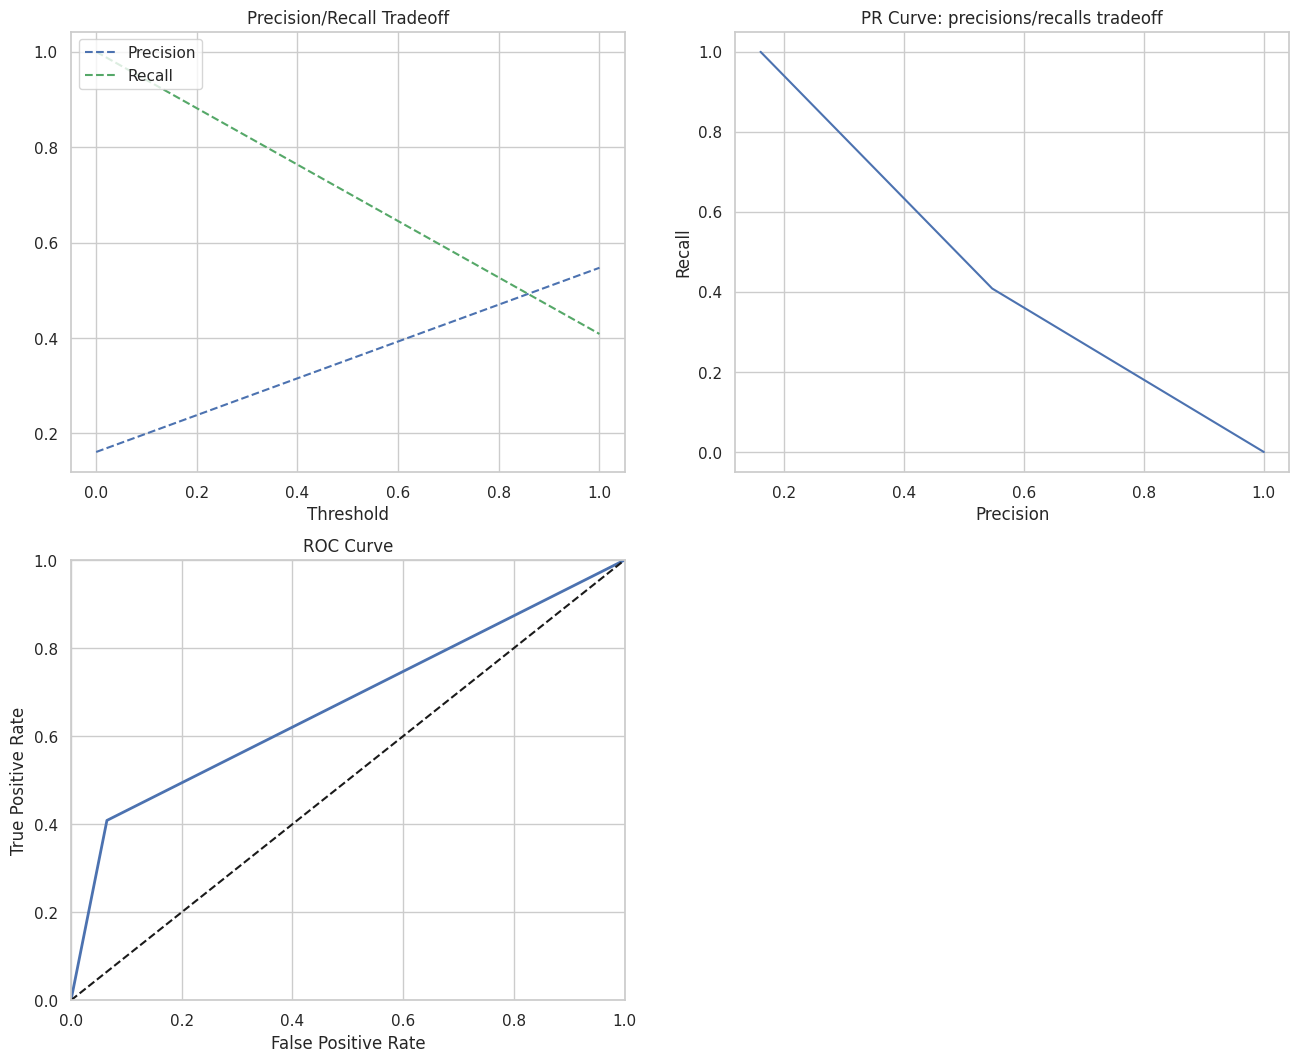

In [37]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [38]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

In [39]:
ml_models = {
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION            roc_auc_score: 0.545
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500


In [40]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)